In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics  import recall_score,precision_score,f1_score,plot_roc_curve

  

In [42]:
from google.colab import files
uploaded=files.upload()

Saving kidney-donor.csv to kidney-donor (1).csv


In [43]:
df=pd.read_csv('kidney-donor.csv')
df.shape


(71920, 18)

In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,hla,bloodgroup,serum,smoking,drining,target
count,67872.000000,71920.000000,71918.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000,71920.000000
mean,54.366337,0.683370,0.966225,131.629853,246.272330,0.148554,0.528003,149.632175,0.327086,1.398999,0.730075,2.313835,0.327086,2.402809,1.046022,0.328643,0.148554,0.543729
std,9.067168,0.465165,1.030339,17.513434,51.743078,0.355651,0.525039,22.873193,0.469152,0.615189,1.021134,0.611461,0.469152,0.700976,1.169819,0.469723,0.355651,0.498088
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.800000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.600000,1.000000,0.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000,4.000000,6.200000,1.000000,1.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71920 entries, 0 to 71919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         67872 non-null  float64
 1   sex         71920 non-null  int64  
 2   cp          71918 non-null  float64
 3   trestbps    71920 non-null  int64  
 4   chol        71920 non-null  int64  
 5   fbs         71920 non-null  int64  
 6   restecg     71920 non-null  int64  
 7   thalach     71920 non-null  int64  
 8   exang       71920 non-null  int64  
 9   slope       71920 non-null  int64  
 10  ca          71920 non-null  int64  
 11  thal        71920 non-null  int64  
 12  hla         71920 non-null  int64  
 13  bloodgroup  71920 non-null  int64  
 14  serum       71920 non-null  float64
 15  smoking     71920 non-null  int64  
 16  drining     71920 non-null  int64  
 17  target      71920 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 9.9 MB


In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,hla,bloodgroup,serum,smoking,drining,target
0,63.0,1,3.0,145,233,1,0,150,0,0,0,1,0,1,4.0,0,1,1
1,37.0,1,2.0,130,250,0,1,187,0,0,0,2,0,2,3.5,1,0,1
2,41.0,0,1.0,130,204,0,0,172,0,2,0,2,0,2,1.4,0,0,1
3,56.0,1,1.0,120,236,0,1,178,0,2,0,2,0,2,0.8,0,0,1
4,57.0,0,0.0,120,354,0,1,163,1,2,0,2,1,2,0.6,1,0,1


In [47]:
df['target'].value_counts()

1    39105
0    32815
Name: target, dtype: int64

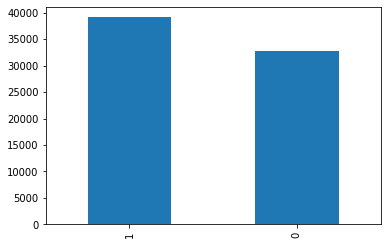

In [48]:
df['target'].value_counts().plot(kind='bar')

In [49]:
df.isna().sum()

age           4048
sex              0
cp               2
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
slope            0
ca               0
thal             0
hla              0
bloodgroup       0
serum            0
smoking          0
drining          0
target           0
dtype: int64

In [50]:
df['cp'] = df['cp'].fillna(df['cp'].mean()) 
df['age'] = df['age'].fillna(df['age'].mean())
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
slope         0
ca            0
thal          0
hla           0
bloodgroup    0
serum         0
smoking       0
drining       0
target        0
dtype: int64

In [51]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,5708,17064
1,27107,22041


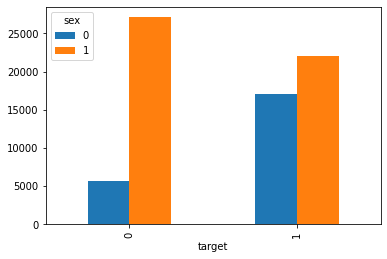

In [52]:
 pd.crosstab(df.target,df.sex).plot(kind='bar')

In [53]:
df.head(
  
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,hla,bloodgroup,serum,smoking,drining,target
0,63.0,1,3.0,145,233,1,0,150,0,0,0,1,0,1,4.0,0,1,1
1,37.0,1,2.0,130,250,0,1,187,0,0,0,2,0,2,3.5,1,0,1
2,41.0,0,1.0,130,204,0,0,172,0,2,0,2,0,2,1.4,0,0,1
3,56.0,1,1.0,120,236,0,1,178,0,2,0,2,0,2,0.8,0,0,1
4,57.0,0,0.0,120,354,0,1,163,1,2,0,2,1,2,0.6,1,0,1


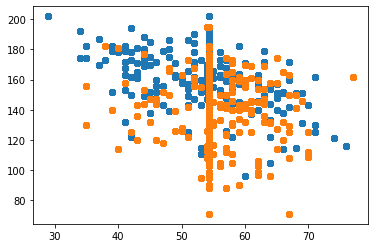

In [54]:
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0])


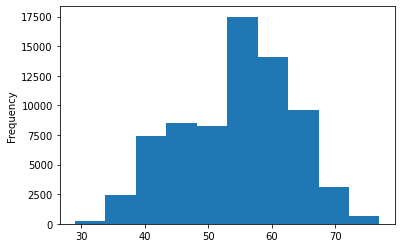

In [55]:
df.age.plot.hist()

In [56]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,hla,bloodgroup,serum,smoking,drining,target
age,1.000000,-0.095652,-0.066609,0.271311,0.207587,0.117832,-0.112884,-0.387030,0.094011,-0.164001,0.268382,0.066039,0.094011,0.075316,0.206595,0.092146,0.117832,-0.218970
sex,-0.095652,1.000000,-0.049351,-0.056996,-0.197861,0.044787,-0.058259,-0.044387,0.141534,-0.030611,0.118212,0.209848,0.141534,0.127961,0.098374,0.141583,0.044787,-0.280992
cp,-0.066609,-0.049351,1.000000,0.047450,-0.076913,0.094213,0.044377,0.295750,-0.394587,0.119844,-0.181214,-0.161792,-0.394587,-0.132410,-0.138636,-0.391241,0.094213,0.433797
trestbps,0.271311,-0.056996,0.047450,1.000000,0.123155,0.177658,-0.114120,-0.046626,0.067697,-0.121635,0.101325,0.062378,0.067697,0.063269,0.195203,0.066765,0.177658,-0.145036
chol,0.207587,-0.197861,-0.076913,0.123155,1.000000,0.013410,-0.151012,-0.009881,0.067144,-0.004147,0.070690,0.098992,0.067144,0.085138,0.052316,0.066550,0.013410,-0.085277
fbs,0.117832,0.044787,0.094213,0.177658,0.013410,1.000000,-0.084306,-0.008627,0.025701,-0.059986,0.138134,-0.032162,0.025701,-0.081073,0.017175,0.025617,1.000000,-0.028116
restecg,-0.112884,-0.058259,0.044377,-0.114120,-0.151012,-0.084306,1.000000,0.043836,-0.070546,0.092787,-0.072225,-0.012065,-0.070546,-0.003863,-0.062761,-0.068382,-0.084306,0.137093
thalach,-0.387030,-0.044387,0.295750,-0.046626,-0.009881,-0.008627,0.043836,1.000000,-0.378850,0.386863,-0.213201,-0.096392,-0.378850,-0.024421,-0.341110,-0.376886,-0.008627,0.421831
exang,0.094011,0.141534,-0.394587,0.067697,0.067144,0.025701,-0.070546,-0.378850,1.000000,-0.257890,0.115624,0.206693,1.000000,0.111846,0.282385,0.996473,0.025701,-0.436731
slope,-0.164001,-0.030611,0.119844,-0.121635,-0.004147,-0.059986,0.092787,0.386863,-0.257890,1.000000,-0.080242,-0.104675,-0.257890,-0.066648,-0.583507,-0.257417,-0.059986,0.345920


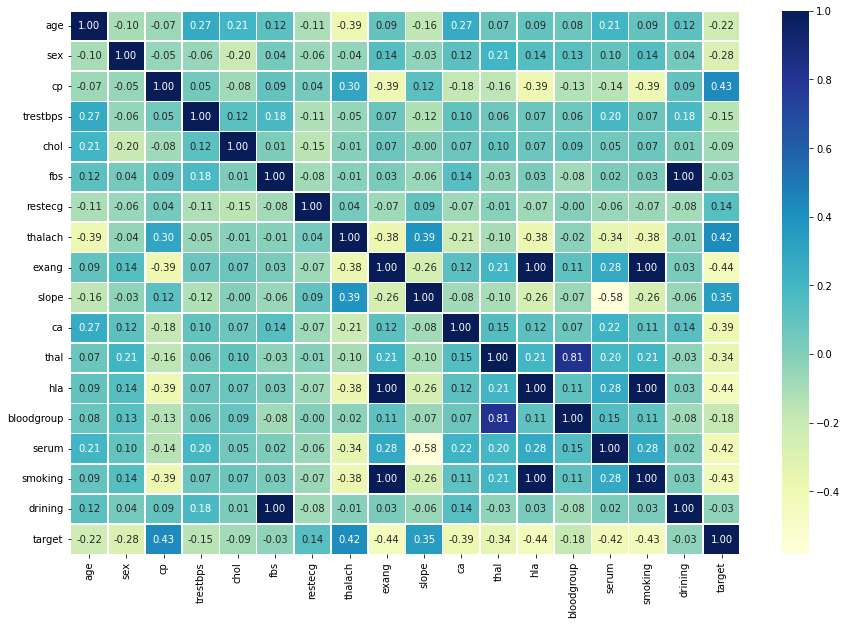

In [57]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

**predicting model using Logistic regression**

In [58]:
X=df.drop('target',axis=1)
Y=df['target']


In [59]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2
                                               )


In [60]:
models={'logistic_reggression':LogisticRegression()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores = {}
  for name ,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name]=model.score(x_test,y_test)
  return model_scores
  



In [61]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [62]:
model_scores

{'logistic_reggression': 0.8606090100111234}

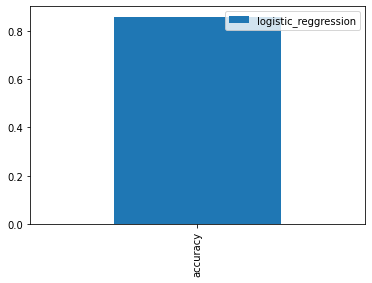

In [63]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.plot.bar()

**BEST PARAMETER FINDING**

In [64]:
log_reg_grid={'C':np.logspace(-4,4,20),'solver':['liblinear']}


In [65]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                          param_distributions= log_reg_grid,n_iter=20,cv=5)

In [66]:
rs_log_reg.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [67]:
rs_log_reg.best_params_


{'C': 11.288378916846883, 'solver': 'liblinear'}

In [68]:
rs_log_reg.score(x_test,y_test)


0.8665183537263627

***EVALUATING THE MODEL***

In [69]:
y_preds=rs_log_reg.predict(x_test)

In [70]:
y_preds

array([1, 1, 0, ..., 0, 1, 1])

In [71]:
y_test

35738    0
59839    1
42391    0
24205    0
39856    1
        ..
59540    1
70616    0
36243    0
54734    0
60400    1
Name: target, Length: 14384, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


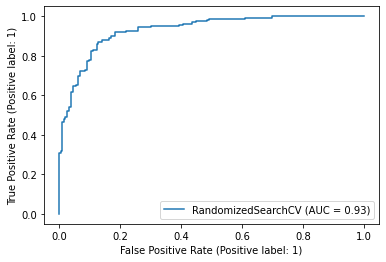

In [72]:
curve=plot_roc_curve(rs_log_reg,x_test,y_test)

In [73]:
print(confusion_matrix(y_test,y_preds))

[[5295 1301]
 [ 619 7169]]


In [74]:
rs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [75]:
clf=LogisticRegression(C=11.288378916846883,solver='liblinear')

In [76]:
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring='accuracy')
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring='precision')
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring='recall')
cv_f1score=cross_val_score(clf,X,Y,cv=5,scoring='f1')



In [77]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8645439377085651

In [78]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8437731211397722

In [79]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9214934151643013

In [80]:
cv_f1score=np.mean(cv_f1score)
cv_f1score

0.8809220773970701